# **Task 1 Exploratory Data Analysis**

# **Importing Libraries**

In [37]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_regression
from datetime import datetime, timedelta, date
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## **1.1 Loading Dataset**

In [38]:
df = pd.read_csv("/content/traffic.csv")
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [39]:
# Describing dataset with datatypes and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## **1.2 Data Exploration**

In [40]:
# Pharsing dates
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.drop(['ID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [41]:
df.describe()

,Junction,Vehicles
count,48120.000000,48120.000000
mean,2.180549,22.791334
std,0.966955,20.750063
min,1.000000,1.000000
25%,1.000000,9.000000
50%,2.000000,15.000000
75%,3.000000,29.000000
max,4.000000,180.000000


In [42]:
# DF to be used for EDA
df_final = df.copy()

## **1.3 Plotting the Timeseries**

Text(0.5, 0, 'Date')

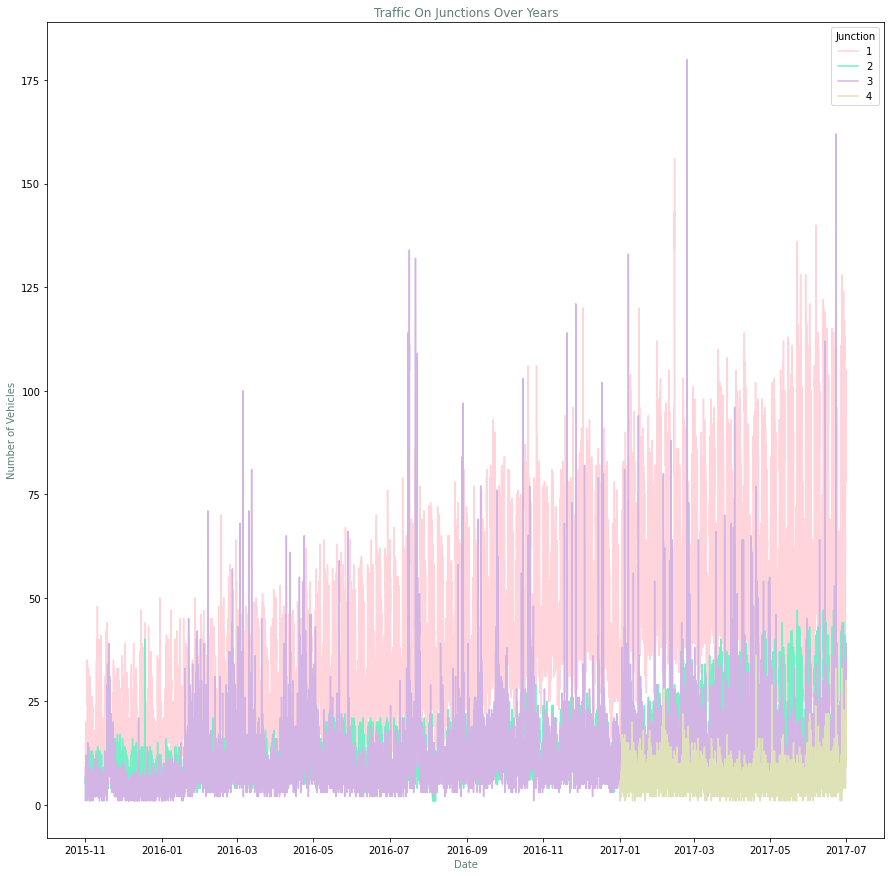

In [43]:
colors = [ "#FFD4DB","#76EEC6","#D3B5E5","#DFE2B6"]
plt.figure(figsize = (15,15))
Time_series = sns.lineplot(x=df['DateTime'],y="Vehicles",data=df_final,hue="Junction",palette=colors)
Time_series.set_title("Traffic On Junctions Over Years", color="#627D78")
Time_series.set_ylabel("Number of Vehicles", color="#627D78")
Time_series.set_xlabel("Date", color="#627D78")

## **1.4 Feature Engineering**

In [44]:
# Creating new features out of DateTime
df_final['Year'] = df_final['DateTime'].dt.year
df_final['Month'] = df_final['DateTime'].dt.month
df_final['Day'] = df_final['DateTime'].dt.day
df_final['Hour'] = df_final['DateTime'].dt.hour
# df_final['Day'] = df_final.DateTime.dt.strftime('%A')
df_final.head()

,DateTime,Junction,Vehicles,Year,Month,Day,Hour
0,2015-11-01 00:00:00,1,15,2015,11,1,0
1,2015-11-01 01:00:00,1,13,2015,11,1,1
2,2015-11-01 02:00:00,1,10,2015,11,1,2
3,2015-11-01 03:00:00,1,7,2015,11,1,3
4,2015-11-01 04:00:00,1,9,2015,11,1,4


## **1.5 Plotting the new created features**

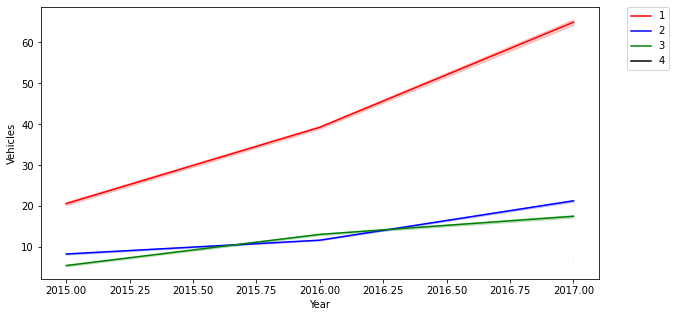

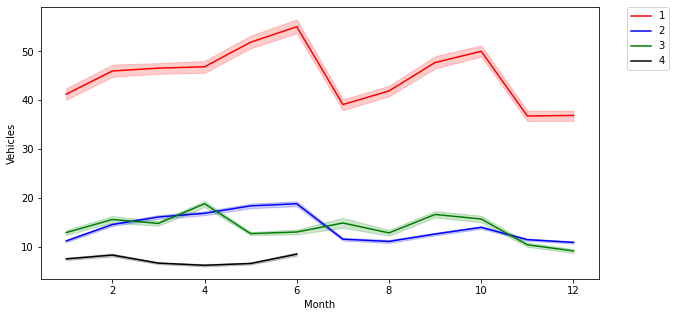

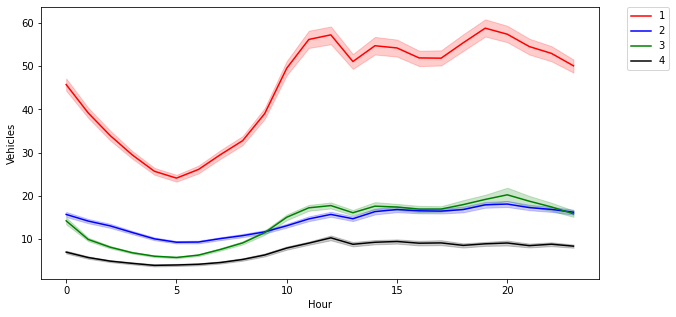

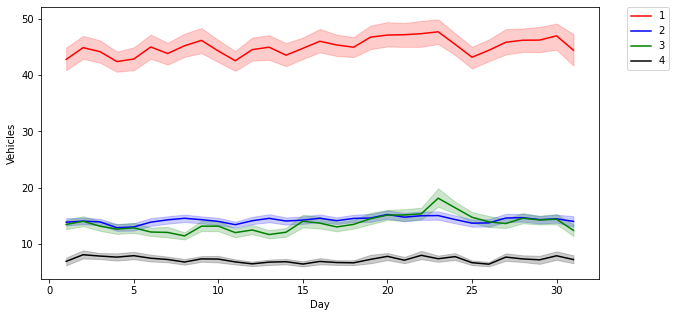

In [45]:
new_features=['Year','Month','Hour','Day']

for i in new_features:
  plt.figure(figsize=(10,5))
  ax=sns.lineplot(x=df_final[i],y="Vehicles",data=df_final,hue="Junction",palette = ['red','blue','green','black'])
  plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

Text(0.5, 0, 'Date')

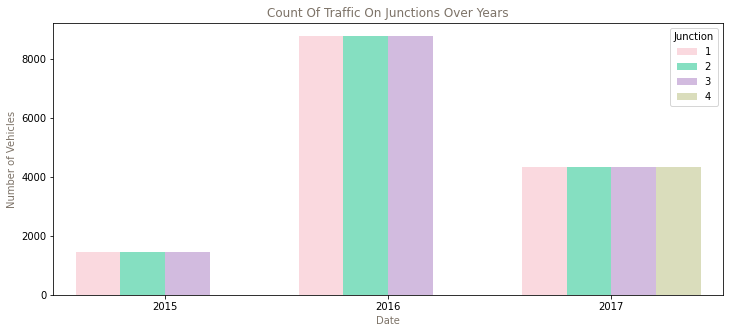

In [46]:
plt.figure(figsize=(12,5))
count = sns.countplot(data=df_final, x =df_final["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years", color="#7D7368")
count.set_ylabel("Number of Vehicles", color="#7D7368")
count.set_xlabel("Date", color="#7D7368")

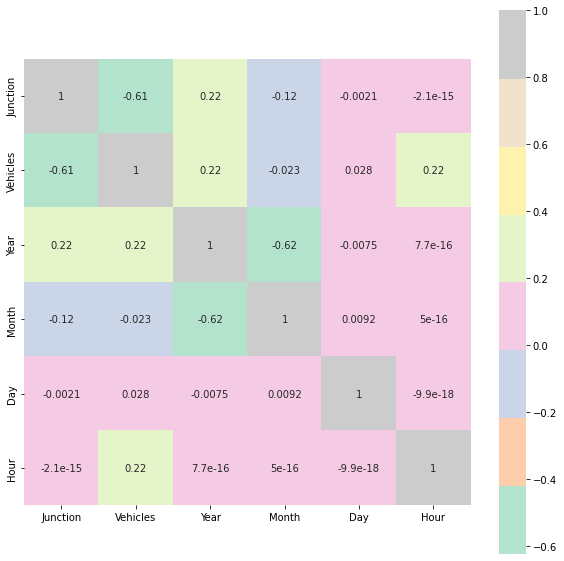

In [47]:
corrmat = df_final.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True)
plt.show()

**Month has negative correlation with Year.**

**The correlation of Vehicles and Year is equal to Vehicles and Hour.**

**Can drop Year or Hour because it's the same.**

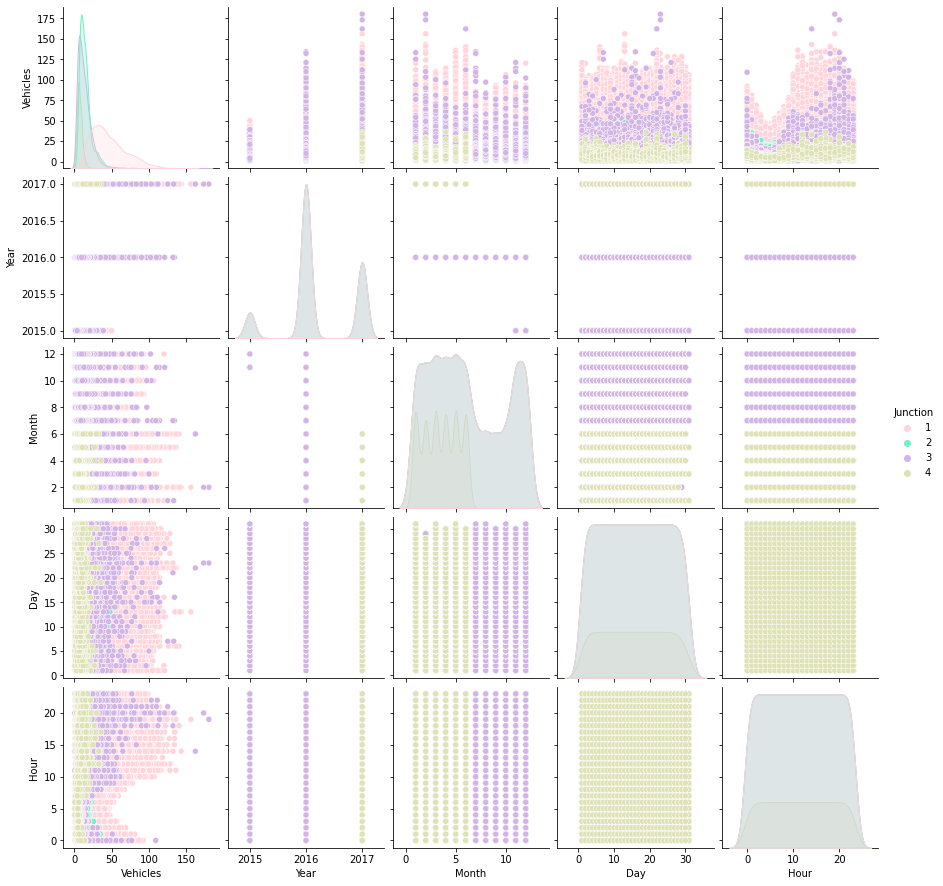

In [48]:
sns.pairplot(data=df_final, hue= "Junction",palette=colors)
plt.show()

# **Task 2 Data Transformation And Preprocessing**

In [49]:
def get_list_data(dataf, drop=[]):
  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")

      
  # create a list of dataframe has the data in that junction and remove the junction identify
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

In [50]:
data = get_list_data(df_final)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [DateTime, Vehicles, Year, Month, Day, Hour]
Index: []
    DateTime  Vehicles  Year  Month  Day  Hour
0 2015-11-01        15  2015     11    1     0
        DateTime  Vehicles  Year  Month  Day  Hour
14592 2015-11-01         6  2015     11    1     0
        DateTime  Vehicles  Year  Month  Day  Hour
29184 2015-11-01         9  2015     11    1     0
        DateTime  Vehicles  Year  Month  Day  Hour
43776 2017-01-01         3  2017      1    1     0


# **Task 3 Modeling**

## **3.1 Create a make metrics function to return R² Score and RMSE from a list of models**

In [51]:
def make_metrics(models):
    data = {
        'name': [model.name for model in models[1:]],
        'r2': [model.r2 for model in models[1:]],
        'rmse': [model.rmse for model in models[1:]]
    }
    data['name'].append('average R2 and sum RMSE')
    data['r2'].append(np.mean(data['r2']))
    data['rmse'].append(np.sum(data['rmse']))
    return pd.DataFrame(data)

In [52]:
data = get_list_data(df_final)
updated_data = []
for i in data:
    i.index = i['DateTime']
    i = i.drop('DateTime', axis=1)
    print(i.head())
    updated_data.append(i)
  
data = updated_data

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
                     Vehicles  Year  Month  Day  Hour
DateTime                                             
2015-11-01 00:00:00        15  2015     11    1     0
2015-11-01 01:00:00        13  2015     11    1     1
2015-11-01 02:00:00        10  2015     11    1     2
2015-11-01 03:00:00         7  2015     11    1     3
2015-11-01 04:00:00         9  2015     11    1     4
                     Vehicles  Year  Month  Day  Hour
DateTime                                             
2015-11-01 00:00:00         6  2015     11    1     0
2015-11-01 01:00:00         6  2015     11    1     1
2015-11-01 02:00:00         5  2015     11    1     2
2015-11-01 03:00:00         6  2015     11    1     3
2015-11-01 04:00:00         7  2015     11    1     4
                     Vehicles  Year  Month  Day  Hour
DateTime                                             
2015-11-01 00:00:00         9  2015     11    1     0
2015-11-01 0

## **3.2 Create a class for a frame for machine learning model**

In [53]:
class Model:
  def __init__(self, name, data, predict_features, test_size, ml_model):
    self.name = name
    self.data = data
    self.predict_features = predict_features
    self.is_trained = False
    self.test_size = test_size
    self.ml_model = ml_model
    self.do_things()

  def cal_rmse(self):
    self.rmse = mean_squared_error(self.ytest, self.ypredict, squared=False)
    return self.rmse

  def prequisite(self, test_size):
    self.features = [i for i in self.data.columns if i != self.predict_features]
    self.X = self.data[self.features].values
    self.y = self.data[self.predict_features].values
    self.Xtrain, self.Xtest, self.ytrain, self.ytest = train_test_split(self.X, self.y, test_size=test_size)
    return None

  def fit(self):
    self.is_trained = True
    self.ml_model.fit(self.Xtrain, self.ytrain)
    self.ypredict = self.ml_model.predict(self.Xtest)
    return self.ml_model

  def cal_r2_score(self):
    self.r2 = r2_score(self.ytest, self.ypredict)
    return self.r2

  def do_things(self) -> None:
    self.prequisite(self.test_size)
    self.fit()
    self.cal_rmse()
    self.cal_r2_score()
    return None

  def __repr__(self) -> str:
    if not self.is_trained:
      return f'<{self.name}> (is not trained yet)>'
    return f'<({self.name}: [R² Score: {self.r2}], [RMSE: {self.rmse}])>'

## **3.3 Training models for 4 junction with normal data**

### **3.3.1 Linear Regression**

In [54]:
models1 = [None]
for i in range(1, 5):
    models1 += [
        Model(
            ml_model=LinearRegression(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models1)

,name,r2,rmse
0,Dataset of junction 1,0.627795,14.130356
1,Dataset of junction 2,0.517655,5.089293
2,Dataset of junction 3,0.242493,9.385109
3,Dataset of junction 4,0.204680,3.021158
4,average R2 and sum RMSE,0.398156,31.625916


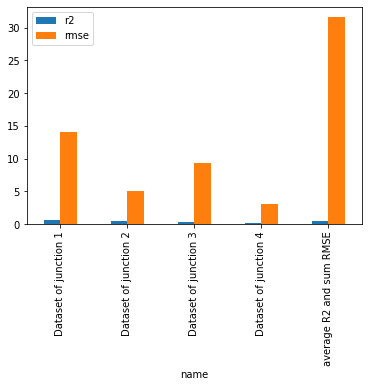

In [55]:
make_metrics(models1).plot(x='name', kind='bar')

### **3.3.2 Decision Tree Regressor Model**

In [56]:
models2 = [None]
for i in range(1, 5):
    models2 += [
        Model(
            ml_model=DecisionTreeRegressor(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models2)

,name,r2,rmse
0,Dataset of junction 1,0.905637,7.066686
1,Dataset of junction 2,0.737109,3.701366
2,Dataset of junction 3,0.558363,6.603989
3,Dataset of junction 4,0.187863,3.136695
4,average R2 and sum RMSE,0.597243,20.508736


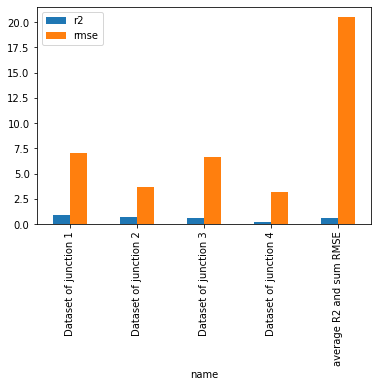

In [57]:
make_metrics(models2).plot(x='name', kind='bar')

### **3.3.3 Random Forest Regressor**

In [58]:
models3 = [None]
for i in range(1, 5):
    models3 += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models3)

,name,r2,rmse
0,Dataset of junction 1,0.942053,5.554341
1,Dataset of junction 2,0.852689,2.798120
2,Dataset of junction 3,0.730608,5.505798
3,Dataset of junction 4,0.495627,2.448317
4,average R2 and sum RMSE,0.755244,16.306576


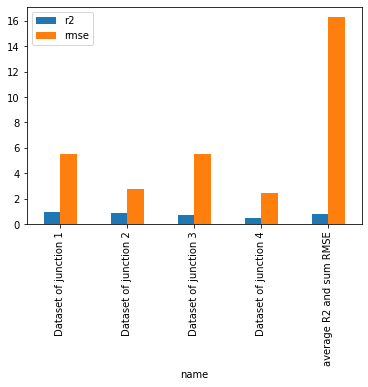

In [59]:
make_metrics(models3).plot(x='name', kind='bar')

# **Task 4 Creating the lag data for predicting the future traffic**

In [60]:
lag_df = df_final.copy()
for i in range(1, 3):
    lag_df[f'Vehicles_lag_{i}'] = df_final.Vehicles.shift(i)

# drop all rows with nan, because lag data cause nan
lag_df.dropna(inplace=True)
lag_df.head()

,DateTime,Junction,Vehicles,Year,Month,Day,Hour,Vehicles_lag_1,Vehicles_lag_2
2,2015-11-01 02:00:00,1,10,2015,11,1,2,13.0,15.0
3,2015-11-01 03:00:00,1,7,2015,11,1,3,10.0,13.0
4,2015-11-01 04:00:00,1,9,2015,11,1,4,7.0,10.0
5,2015-11-01 05:00:00,1,6,2015,11,1,5,9.0,7.0
6,2015-11-01 06:00:00,1,9,2015,11,1,6,6.0,9.0


In [61]:
lag_data = get_list_data(lag_df, drop=['Year'])
updated_lag_data = []
for i in lag_data:
    i.index = i['DateTime']
    i = i.drop('DateTime', axis=1)
    print(i.head(1))
    updated_lag_data.append(i)

lag_data = updated_lag_data

Empty DataFrame
Columns: [Vehicles, Month, Day, Hour, Vehicles_lag_1, Vehicles_lag_2]
Index: []
                     Vehicles  Month  Day  Hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 02:00:00        10     11    1     2            13.0   

                     Vehicles_lag_2  
DateTime                             
2015-11-01 02:00:00            15.0  
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         6     11    1     0            78.0            84.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         9     11    1     0            27.0            29.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2017-01-01         3

##**4.1 Lag data is appropriate for time series data, use for create the auto correlation**

In [62]:
# Auto Correlation

In [63]:
lag_models = [None]
for i in range(1, 5):
    lag_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i} with lag data',
            data=lag_data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]

make_metrics(lag_models)

,name,r2,rmse
0,Dataset of junction 1 with lag data,0.970144,3.965055
1,Dataset of junction 2 with lag data,0.887719,2.525211
2,Dataset of junction 3 with lag data,0.713941,5.472648
3,Dataset of junction 4 with lag data,0.434496,2.699641
4,average R2 and sum RMSE,0.751575,14.662556


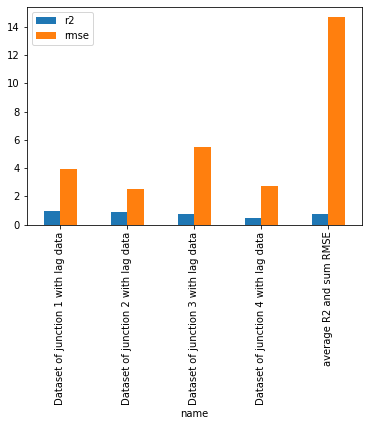

In [64]:
make_metrics(lag_models).plot(x='name', kind='bar')

## **4.2 Predict next 6 months**

**We predict for each Junction separately. We use previous prediction amounts of Vehicles for predicting next amounts of Vehicles.**

In [65]:
for junction in range(1, 5):
    cur_time = lag_data[junction].tail(1).index[0] # get the current time, the last time of that dataset
    end_time = pd.Timestamp(2018, 1, 1, 0, 0, 0) # the end time after 6 months that we want to predict
    new_data = lag_data[junction].copy() # create a copy of dataset with that junction
    features = lag_models[junction].features # get features of each models in that junction
    while cur_time != end_time:
        last = new_data.tail(1).copy() # get the last row of dataset, just make a copy!
        new_data = pd.concat([new_data, last]) # concatenate the copy dataset with it's last row
        for i in range(1, 3): # create lag data
            new_data[f'Vehicles_lag_{i}'] = new_data.Vehicles.shift(i) # shift by periods i
        new_data.iloc[len(new_data) - 1, [1, 2, 3]] = [cur_time.month, cur_time.day, cur_time.hour] # assign value for those columns
        last = new_data[features].tail(1).values # create a new last data that drop all nan
        new_data.iloc[len(new_data) - 1, 0] = round(lag_models[1].ml_model.predict(last)[0]) # predicting for vehicles
        cur_time += timedelta(hours=1) # add to a cur_time 1 hour
    new_data.index = pd.date_range(
        start=lag_data[junction].head(1).index.values[0],
        end=pd.Timestamp(2018, 1, 1, 0, 0, 0),
        freq='H'
    ) # reassign index with the new time range with start is the start of data
      # and end time is the end time that initialize in start of the loop
    new_data.to_csv(f'vehicles_for_next_6_months_in_junction_{junction}.csv') # to csv that file
    print(f'|==Predicted for Junction {junction}==|')


|==Predicted for Junction 1==|
|==Predicted for Junction 2==|
|==Predicted for Junction 3==|
|==Predicted for Junction 4==|


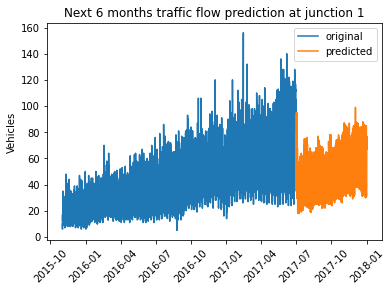

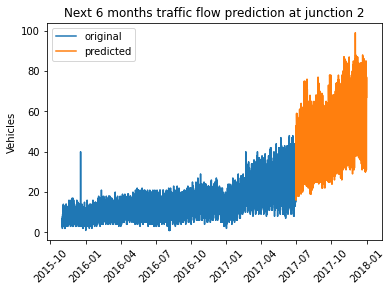

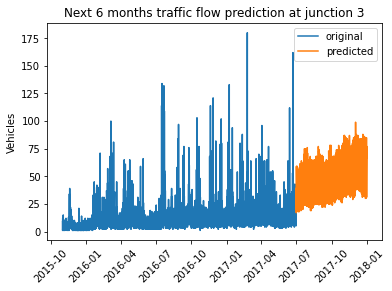

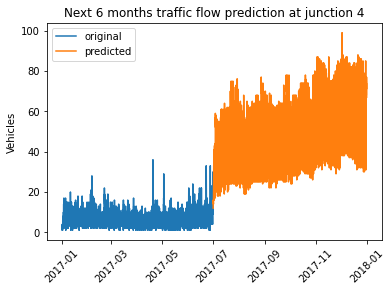

In [66]:
for junction in range(1, 5):
  junction_data = pd.read_csv(f"/content/vehicles_for_next_6_months_in_junction_{junction}.csv", index_col=0, parse_dates=True, infer_datetime_format=True)

  cur_time = lag_data[junction].tail(1).index[0]
  end_time = junction_data.tail(1).index[0]

  predicted_df = junction_data[cur_time: end_time]
  ax = sns.lineplot(x=junction_data[:cur_time].index, y="Vehicles", data=junction_data[:cur_time], label="original")
  ax = sns.lineplot(x=predicted_df.index, y="Vehicles", data=predicted_df, ax=ax, label="predicted")
  plt.xticks(rotation=45)
  plt.legend()
  plt.title(f"Next 6 months traffic flow prediction at junction {junction}")
  plt.show()